# MSDS692 Project: Data Preprocessing - Labor Force
## Natalia Weakly    

### Original data source: United States Department of Labor, Bureau of Labor Statistics https://www.bls.gov/lau/ 
 

In [3]:
#Imports
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#load labor force data
laborForceDenver=pd.read_csv('../MSDSProject/laborForce_DenverMetro.txt', header=5, usecols=['Year', 'Period', 'labor force', 'employment'], parse_dates=True)

In [7]:
laborForceDenver

,Year,Period,labor force,employment
0,2014,Jan,1464739,1375417
1,2014,Feb,1471482,1381666
2,2014,Mar,1472531,1387011
3,2014,Apr,1479494,1401874
4,2014,May,1483938,1412774
5,2014,Jun,1495452,1422939
6,2014,Jul,1498483,1429521
7,2014,Aug,1495025,1429710
8,2014,Sep,1493310,1433019
9,2014,Oct,1502265,1443150


In [8]:
laborForceDenver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
Year           61 non-null object
Period         60 non-null object
labor force    60 non-null object
employment     60 non-null object
dtypes: object(4)
memory usage: 2.0+ KB


In [9]:
#drop the last row
laborForceDenver.drop(laborForceDenver.tail(1).index, inplace=True)

In [10]:
# check results
laborForceDenver.tail(5)

,Year,Period,labor force,employment
55,2018,Aug,1648081,1593469
56,2018,Sep,1643442,1593774
57,2018,Oct,1650347,1600869
58,2018,Nov,1648560,1594740
59,2018,Dec,1648629(P),1587640(P)


In [11]:
# At the time of the download, data for December 2018 was preliminary - marked with "P"
# we need to delete (P) from the last row
laborForceDenver.iloc[59, :] = laborForceDenver.iloc[59, :].str.replace("\(P\)", "", regex=True)

In [12]:
laborForceDenver.tail()

,Year,Period,labor force,employment
55,2018,Aug,1648081,1593469
56,2018,Sep,1643442,1593774
57,2018,Oct,1650347,1600869
58,2018,Nov,1648560,1594740
59,2018,Dec,1648629,1587640


In [13]:
#Create a column for a full date/time  (as a string)
laborForceDenver['date']=laborForceDenver['Year'] + ' ' + laborForceDenver['Period']

In [14]:
laborForceDenver.head()

,Year,Period,labor force,employment,date
0,2014,Jan,1464739,1375417,2014 Jan
1,2014,Feb,1471482,1381666,2014 Feb
2,2014,Mar,1472531,1387011,2014 Mar
3,2014,Apr,1479494,1401874,2014 Apr
4,2014,May,1483938,1412774,2014 May


In [15]:
laborForceDenver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 5 columns):
Year           60 non-null object
Period         60 non-null object
labor force    60 non-null object
employment     60 non-null object
date           60 non-null object
dtypes: object(5)
memory usage: 5.3+ KB


In [16]:
#convert data to the proper date/time format
laborForceDenver['date']=pd.to_datetime(laborForceDenver['date'])

In [17]:
#check results
laborForceDenver.head()

,Year,Period,labor force,employment,date
0,2014,Jan,1464739,1375417,2014-01-01
1,2014,Feb,1471482,1381666,2014-02-01
2,2014,Mar,1472531,1387011,2014-03-01
3,2014,Apr,1479494,1401874,2014-04-01
4,2014,May,1483938,1412774,2014-05-01


In [18]:
laborForceDenver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 5 columns):
Year           60 non-null object
Period         60 non-null object
labor force    60 non-null object
employment     60 non-null object
date           60 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 5.3+ KB


In [19]:
#convert 'labor force' to numeric
laborForceDenver['labor force'] = pd.to_numeric(laborForceDenver['labor force'], errors='coerce')

In [20]:
#convert 'employment' column to numeric
laborForceDenver['employment'] = pd.to_numeric(laborForceDenver['employment'], errors='coerce')

In [21]:
#check results
laborForceDenver.head()

,Year,Period,labor force,employment,date
0,2014,Jan,1464739,1375417,2014-01-01
1,2014,Feb,1471482,1381666,2014-02-01
2,2014,Mar,1472531,1387011,2014-03-01
3,2014,Apr,1479494,1401874,2014-04-01
4,2014,May,1483938,1412774,2014-05-01


In [22]:
laborForceDenver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 5 columns):
Year           60 non-null object
Period         60 non-null object
labor force    60 non-null int64
employment     60 non-null int64
date           60 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 5.3+ KB


In [23]:
#drop initial 'Year' and "Period' columns
laborForceDenver.drop(['Year', 'Period'], axis=1, inplace=True)

In [24]:
#Repeat the same transformations for labor Force Boulder
#load labor force data
laborForceBoulder=pd.read_csv('../MSDSProject/laborForce_BoulderMetro.txt', header=5, usecols=['Year', 'Period', 'labor force', 'employment'], parse_dates=True)

In [25]:
#look at the load results
laborForceBoulder

,Year,Period,labor force,employment
0,2014,Jan,174944,166061
1,2014,Feb,176385,167224
2,2014,Mar,175526,166989
3,2014,Apr,175373,167797
4,2014,May,175863,168760
5,2014,Jun,175140,167663
6,2014,Jul,175387,168270
7,2014,Aug,174806,168210
8,2014,Sep,177195,171214
9,2014,Oct,178813,172824


In [26]:
laborForceBoulder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
Year           61 non-null object
Period         60 non-null object
labor force    60 non-null object
employment     60 non-null object
dtypes: object(4)
memory usage: 2.0+ KB


In [27]:
#drop the last row
laborForceBoulder.drop(laborForceBoulder.tail(1).index, inplace=True)
#check results
laborForceBoulder.tail()

,Year,Period,labor force,employment
55,2018,Aug,191643,185638
56,2018,Sep,193988,188629
57,2018,Oct,195592,190209
58,2018,Nov,195553,189911
59,2018,Dec,194860(P),188507(P)


In [28]:
# At the time of the download, data for December 2018 was preliminary - marked with "P"
# we need to delete (P) from the last row
laborForceBoulder.iloc[59, :] = laborForceBoulder.iloc[59, :].str.replace("\(P\)", "", regex=True)
#check results
laborForceBoulder.tail()

,Year,Period,labor force,employment
55,2018,Aug,191643,185638
56,2018,Sep,193988,188629
57,2018,Oct,195592,190209
58,2018,Nov,195553,189911
59,2018,Dec,194860,188507


In [29]:
#Create a columns for a full date/time  (as a string)
laborForceBoulder['date']=laborForceBoulder['Year'] + ' ' + laborForceBoulder['Period']
#convert data to the proper date/time format
laborForceBoulder['date']=pd.to_datetime(laborForceBoulder['date'])
#check results
laborForceBoulder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 5 columns):
Year           60 non-null object
Period         60 non-null object
labor force    60 non-null object
employment     60 non-null object
date           60 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 5.3+ KB


In [30]:
laborForceBoulder.head()

,Year,Period,labor force,employment,date
0,2014,Jan,174944,166061,2014-01-01
1,2014,Feb,176385,167224,2014-02-01
2,2014,Mar,175526,166989,2014-03-01
3,2014,Apr,175373,167797,2014-04-01
4,2014,May,175863,168760,2014-05-01


In [31]:
#convert 'labor force' to numeric
laborForceBoulder['labor force'] = pd.to_numeric(laborForceBoulder['labor force'], errors='coerce')
#convert 'employment' column to numeric
laborForceBoulder['employment'] = pd.to_numeric(laborForceBoulder['employment'], errors='coerce')
#check results
laborForceBoulder.head()

,Year,Period,labor force,employment,date
0,2014,Jan,174944,166061,2014-01-01
1,2014,Feb,176385,167224,2014-02-01
2,2014,Mar,175526,166989,2014-03-01
3,2014,Apr,175373,167797,2014-04-01
4,2014,May,175863,168760,2014-05-01


In [32]:
laborForceBoulder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 5 columns):
Year           60 non-null object
Period         60 non-null object
labor force    60 non-null int64
employment     60 non-null int64
date           60 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 5.3+ KB


In [33]:
#drop initial 'Year' and "Period' columns
laborForceBoulder.drop(['Year', 'Period'], axis=1, inplace=True)

In [34]:
#Merge Denver and Bolder metro areas data frames into one 
laborForceMetro = pd.merge(laborForceDenver, laborForceBoulder, on='date', how='outer', suffixes=('_Denver', '_Boulder'))

In [35]:
#check results
laborForceMetro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 5 columns):
labor force_Denver     60 non-null int64
employment_Denver      60 non-null int64
date                   60 non-null datetime64[ns]
labor force_Boulder    60 non-null int64
employment_Boulder     60 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 2.8 KB


In [36]:
laborForceMetro

,labor force_Denver,employment_Denver,date,labor force_Boulder,employment_Boulder
0,1464739,1375417,2014-01-01,174944,166061
1,1471482,1381666,2014-02-01,176385,167224
2,1472531,1387011,2014-03-01,175526,166989
3,1479494,1401874,2014-04-01,175373,167797
4,1483938,1412774,2014-05-01,175863,168760
5,1495452,1422939,2014-06-01,175140,167663
6,1498483,1429521,2014-07-01,175387,168270
7,1495025,1429710,2014-08-01,174806,168210
8,1493310,1433019,2014-09-01,177195,171214
9,1502265,1443150,2014-10-01,178813,172824


In [37]:
#change the order of the columns
columnTitles = ['date', 'labor force_Denver', 'employment_Denver', 'labor force_Boulder', 'employment_Boulder']
laborForceMetro = laborForceMetro.reindex(columns=columnTitles)

In [38]:
laborForceMetro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 5 columns):
date                   60 non-null datetime64[ns]
labor force_Denver     60 non-null int64
employment_Denver      60 non-null int64
labor force_Boulder    60 non-null int64
employment_Boulder     60 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 2.8 KB


In [39]:
#add additional columns for totals of labor force and employment in Denver and Boulder metro areas
laborForceMetro['totalLaborForce'] = laborForceMetro['labor force_Denver'] + laborForceMetro['labor force_Boulder']
laborForceMetro['totalEmployment'] = laborForceMetro['employment_Denver'] + laborForceMetro['employment_Boulder']

In [40]:
#check results
laborForceMetro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 7 columns):
date                   60 non-null datetime64[ns]
labor force_Denver     60 non-null int64
employment_Denver      60 non-null int64
labor force_Boulder    60 non-null int64
employment_Boulder     60 non-null int64
totalLaborForce        60 non-null int64
totalEmployment        60 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 3.8 KB


In [41]:
laborForceMetro

,date,labor force_Denver,employment_Denver,labor force_Boulder,employment_Boulder,totalLaborForce,totalEmployment
0,2014-01-01,1464739,1375417,174944,166061,1639683,1541478
1,2014-02-01,1471482,1381666,176385,167224,1647867,1548890
2,2014-03-01,1472531,1387011,175526,166989,1648057,1554000
3,2014-04-01,1479494,1401874,175373,167797,1654867,1569671
4,2014-05-01,1483938,1412774,175863,168760,1659801,1581534
5,2014-06-01,1495452,1422939,175140,167663,1670592,1590602
6,2014-07-01,1498483,1429521,175387,168270,1673870,1597791
7,2014-08-01,1495025,1429710,174806,168210,1669831,1597920
8,2014-09-01,1493310,1433019,177195,171214,1670505,1604233
9,2014-10-01,1502265,1443150,178813,172824,1681078,1615974


In [43]:
#Correlation between variables
sns.set(style="white")
#Correlation matrix
corr = laborForceMetro.corr()
corr

,labor force_Denver,employment_Denver,labor force_Boulder,employment_Boulder,totalLaborForce,totalEmployment
labor force_Denver,1.000000,0.989605,0.968969,0.970787,0.999685,0.990100
employment_Denver,0.989605,1.000000,0.951018,0.973304,0.988493,0.999747
labor force_Boulder,0.968969,0.951018,1.000000,0.989591,0.974869,0.957051
employment_Boulder,0.970787,0.973304,0.989591,1.000000,0.975451,0.978224
totalLaborForce,0.999685,0.988493,0.974869,0.975451,1.000000,0.989552
totalEmployment,0.990100,0.999747,0.957051,0.978224,0.989552,1.000000


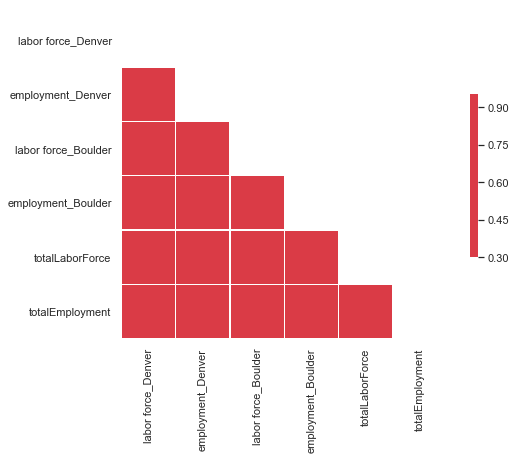

In [45]:
#adapted from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html?highlight=correlation
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


There is a very strong correlation (all indicators above 95%) between both employment and labor force statistics for both Boulder and Denver, as well as totals for the Metro regoion. So, any of these indicators can be potentially used as a proxy for population dinamics in the region. 

In [46]:
#output labor force data to a file for future use
laborForceMetro.to_csv('laborForceMetro.csv', date_format='%Y-%m-%d %H:%M:%S')